In [19]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
# fetch 20newsgroups data
remove = ['headers', 'footers', 'quotes']
twenty_all = fetch_20newsgroups(subset='all', categories=None, remove=remove, shuffle=True,
    random_state=0)

count_vec = CountVectorizer(min_df=5, stop_words='english', lowercase=True)
X = count_vec.fit_transform(twenty_all.data)
feature_names = count_vec.get_feature_names_out()

In [21]:
# fit LDA
topic_num=10
lda = LatentDirichletAllocation(n_components=topic_num, max_iter=50,
    learning_method='batch', random_state=0)
lda.fit(X)

LatentDirichletAllocation(max_iter=50, random_state=0)

In [22]:
# LDA result output
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
n_words = 10
for i in range(topic_num):
    topic_words = feature_names[sorting[i, :n_words]]
    print(f'Topic {i}: {",".join(topic_words)}')

Topic 0: 00,10,game,25,team,20,11,15,12,games
Topic 1: armenian,people,said,armenians,turkish,000,new,war,children,gun
Topic 2: like,just,good,time,don,car,space,think,know,ve
Topic 3: edu,image,com,ftp,file,available,graphics,mail,jpeg,pub
Topic 4: god,people,does,jesus,don,say,think,believe,know,just
Topic 5: use,key,file,program,window,information,using,data,encryption,code
Topic 6: ax,max,g9v,b8f,a86,pl,145,1d9,0t,1t
Topic 7: cx,w7,ah,mv,c_,uw,lk,t7,hz,ck
Topic 8: windows,dos,drive,use,know,thanks,like,card,does,just
Topic 9: people,don,think,just,know,like,government,right,did,going


In [24]:
# predict
new_doc = ['Safran, Terran Orbital to explore joint production of satellite propulsion systems']
new_doc_vec = count_vec.transform(new_doc)
topic_scores = lda.transform(new_doc_vec)
print(topic_scores)

[[0.01250002 0.01250136 0.88748796 0.01250459 0.01250046 0.01250415
  0.0125     0.0125     0.01250117 0.01250029]]


### Occurrences of each word

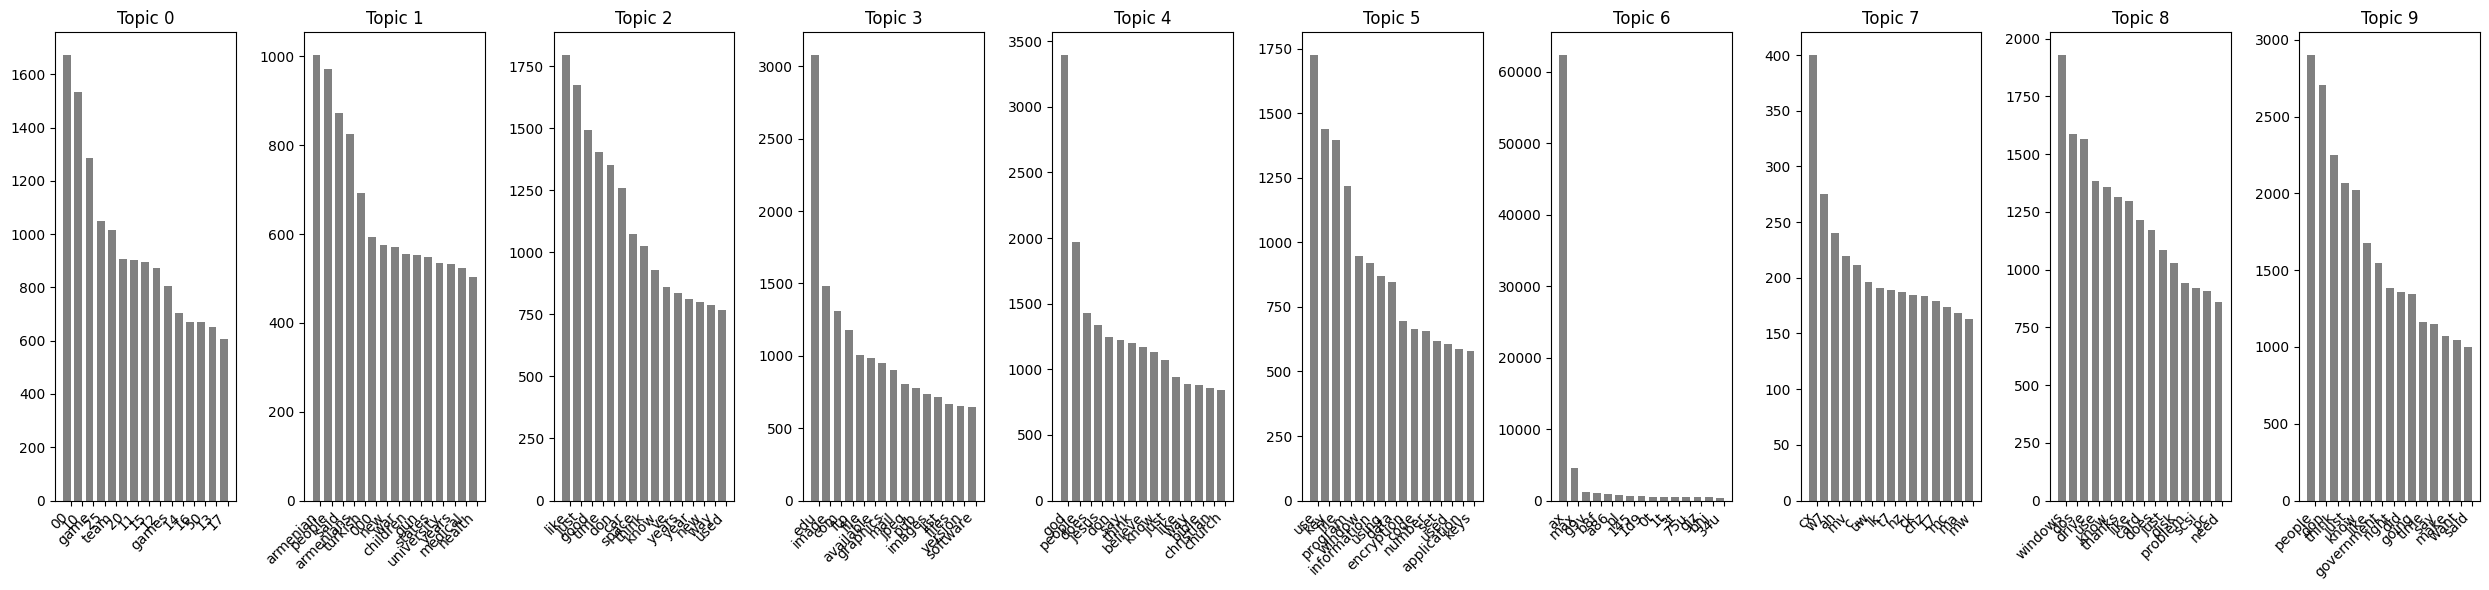

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=topic_num, figsize=(25, 6))

for i, ax in enumerate(axes.flat):
    topic_words = [feature_names[idx] for idx in sorting[i, :15]]
    topic_scores = lda.components_[i, sorting[i, :15]]

    ax.bar(range(15), topic_scores, width=0.7, color='grey')
    ax.set_xticks(np.arange(0.35, 15))
    ax.set_xticklabels(topic_words, rotation=45, fontsize=10, ha='right')

    ax.set_title("Topic {}".format(i))

plt.tight_layout()
plt.show()